In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import _pickle as pickle

In [1]:
import multiprocessing as mp
print("Number of processors: ", mp.cpu_count())

Number of processors:  24


In [3]:
df1 = pd.read_csv('../data/libre/AbbeyHamill_glucose_5-8-2019.csv')

In [4]:
df1.columns

Index(['Device', 'Serial Number', 'Device Timestamp', 'Record Type',
       'Historic Glucose mmol/L', 'Scan Glucose mmol/L',
       'Non-numeric Rapid-Acting Insulin', 'Rapid-Acting Insulin (units)',
       'Non-numeric Food', 'Carbohydrates (grams)', 'Carbohydrates (servings)',
       'Non-numeric Long-Acting Insulin', 'Long-Acting Insulin Value (units)',
       'Notes', 'Strip Glucose mmol/L', 'Ketone mmol/L',
       'Meal Insulin (units)', 'Correction Insulin (units)',
       'User Change Insulin (units)'],
      dtype='object')

In [5]:
def extract_bg(df1):
    df1['bg'] = df1['Historic Glucose mmol/L'].fillna(df1['Scan Glucose mmol/L'])
    df_p = df1[['Device Timestamp','bg']]
    df_p.columns = ['time', 'bg']
    df_p['time'] = pd.to_datetime(df_p['time'], format='%d-%m-%Y %H:%M')
    df_p = df_p.set_index('time').sort_index(ascending=True)
    df_p = df_p.interpolate()
    return df_p

In [6]:
df_p = extract_bg(df1)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [7]:
dfs = []
for file in os.listdir('../data/libre/'):
    print(file)
    if file.find('.csv')!=-1:
        df = pd.read_csv('../data/libre/'+file)
        df_p = extract_bg(df)
        dfs.append(df_p)

Chloe AliceEtherington_glucose_5-8-2019.csv
MarkHeybourne_glucose_5-8-2019.csv


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


JohnValentine_glucose_5-8-2019.csv
AdamTelford_glucose_5-8-2019.csv
KaneegaiChinapyel_glucose_5-8-2019.csv
CharlieCampbell_glucose_5-8-2019.csv
ClareWebb_glucose_5-8-2019.csv
JennaLynch_glucose_5-8-2019.csv
JosephWilliamson_glucose_5-8-2019.csv
LaelPanter_glucose_5-8-2019.csv
KirstyHiggins_glucose_5-8-2019.csv
NikElphick_glucose_5-8-2019.csv
AndrewDonovan _glucose_5-8-2019.csv
KimberleyTocock_glucose_5-8-2019.csv
DipikaNoble_glucose_5-8-2019.csv
Devina Charles _glucose_5-8-2019.csv
EmmelineFenn_glucose_5-8-2019.csv
JenniferTowner_glucose_5-8-2019.csv
Kimberley Gavigan_glucose_5-8-2019.csv
ATreasure_glucose_5-8-2019.csv
natashaparkinson_glucose_5-8-2019.csv
SamanthaSanders_glucose_5-8-2019.csv
GillTaylor_glucose_5-8-2019.csv


/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


BeverleyHerrington_glucose_5-8-2019.csv
SophieRumbold_glucose_5-8-2019.csv
JamesHamer_glucose_5-8-2019.csv
EmilyAllan_glucose_5-8-2019.csv
Cherelle Allen-springer __5-8-2019.csv
MattPhillips_glucose_5-8-2019.csv
CraigLittle _glucose_5-8-2019.csv
BenClaridge_glucose_5-8-2019.csv
ClaireWagman_glucose_5-8-2019.csv
TrudyCleary_glucose_5-8-2019.csv
TayabaAsif_glucose_5-8-2019.csv
MathewWheeler_glucose_5-8-2019.csv
JakeSwift_glucose_5-8-2019.csv
MichelleHancock_glucose_5-8-2019.csv
MaryHalpin_glucose_5-8-2019.csv
HarrySawbridge_glucose_5-8-2019.csv
PaulRobinson_glucose_5-8-2019.csv
Sarah-Jane Beattie_glucose_5-8-2019.csv
AmritaGill_glucose_5-8-2019.csv
JamesTutcher_glucose_5-8-2019.csv
HelenStock_glucose_5-8-2019.csv
JamesNowecki_glucose_5-8-2019.csv
LindaPelling_glucose_5-8-2019.csv
KeziaNankivell_glucose_5-8-2019.csv
JenniferCaston_glucose_5-8-2019.csv
RoxyBonner_glucose_5-8-2019.csv
ZoeBradley _glucose_5-8-2019.csv
ClaireAllen_glucose_5-8-2019.csv
PaulStacey_glucose_5-8-2019.csv
SarahDudl

## EDA

In [8]:
def plot_gs_data(gs_df, title="Glucose data"):
    fig, ax1 = plt.subplots(figsize=(18, 8))
    plt.title(title)
    plt.scatter(gs_df.index, gs_df.bg.values, color='r')
    ax1.set_ylabel('Blood glucose', color='r')
    plt.legend(['bg data'], loc=(0.01, 0.95))
    plt.grid(True)

In [30]:
# plot_gs_data(dfs[0]['2019-02-02'])
gs_df = dfs[0]['2019-02-03']
fig, ax1 = plt.subplots(figsize=(18, 8))
plt.scatter(gs_df.index, gs_df.bg.values, color='r')
ax1.set_ylabel('Blood glucose', color='r')
plt.legend(['bg data'])
plt.grid(True)

# gs_df.index

DatetimeIndex(['2019-02-03 00:07:00', '2019-02-03 00:22:00',
               '2019-02-03 00:37:00', '2019-02-03 00:52:00',
               '2019-02-03 01:07:00', '2019-02-03 01:22:00',
               '2019-02-03 01:37:00', '2019-02-03 01:52:00',
               '2019-02-03 02:07:00', '2019-02-03 02:23:00',
               ...
               '2019-02-03 21:43:00', '2019-02-03 21:58:00',
               '2019-02-03 22:13:00', '2019-02-03 22:28:00',
               '2019-02-03 22:43:00', '2019-02-03 22:58:00',
               '2019-02-03 23:13:00', '2019-02-03 23:28:00',
               '2019-02-03 23:43:00', '2019-02-03 23:58:00'],
              dtype='datetime64[ns]', name='time', length=107, freq=None)

In [31]:
gs_df

,bg
time,
2019-02-03 00:07:00,11.7
2019-02-03 00:22:00,11.9
2019-02-03 00:37:00,12.1
2019-02-03 00:52:00,11.8
2019-02-03 01:07:00,11.4
...,...
2019-02-03 22:58:00,13.1
2019-02-03 23:13:00,13.9
2019-02-03 23:28:00,14.3


KeyError: '2019-01-30'

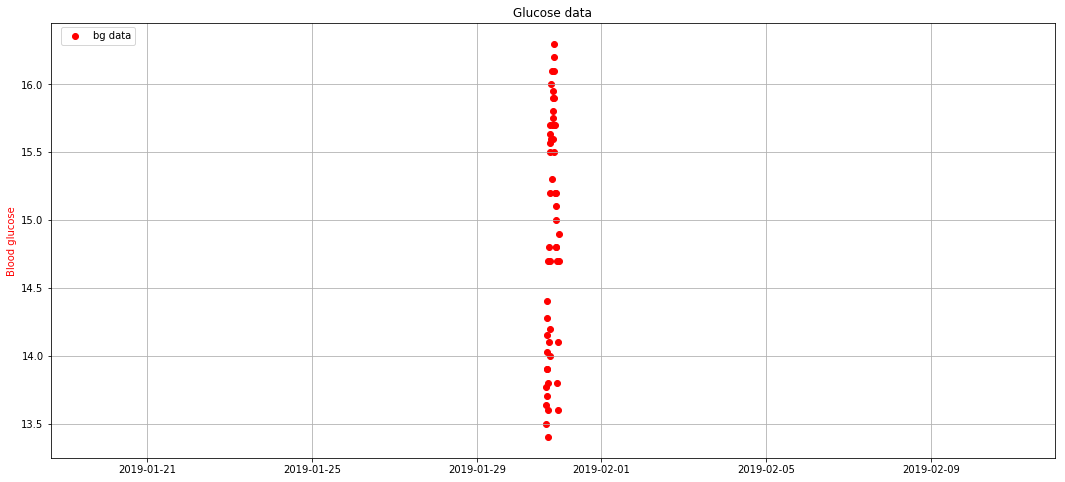

In [16]:
for df in dfs:
#     print(df.index)
    plot_gs_data(df['2019-01-30'])

In [198]:
##OpenAPS 

In [191]:

df_bg_20396154 = pickle.load(open('../data/entries_20396154.pkl', 'rb'))

In [196]:
df_bg_20396154 = df_bg_20396154.set_index('datetime')

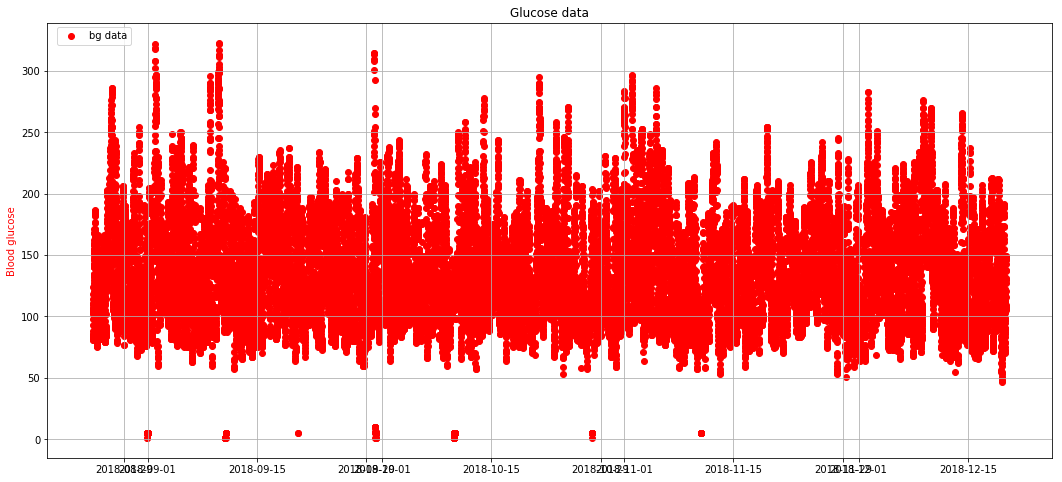

In [197]:
plot_gs_data(df_bg_20396154.rename(columns={"datetime":"time","sgv":"bg"}))